# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = '../data/train.p'
validation_file= '../data/valid.p'
testing_file = '../data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
import numpy as np

In [3]:
# Seeing what I have loaded
type(X_train)

numpy.ndarray

In [4]:
# Checking the shape of X_train
X_train.shape

(34799, 32, 32, 3)

In [5]:
# I can see that the images are 32x32x3 (RGB) and there are just under 35k images in the
# training set

In [6]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [7]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

In [8]:
# Setting a style
plt.style.use('seaborn-darkgrid')

In [9]:
# Let's make a dictionary of the class IDs and what sign they represent
# First I'll load in the csv file that has the information
import pandas as pd
sign_names = pd.read_csv('signnames.csv')
sign_names.head()

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [10]:
# Rather than a dictionary, I can just use this pandas dataframe if I set the index
# to ClassID
sign_names.set_index('ClassId', inplace=True)

In [11]:
sign_names.loc[0]

SignName    Speed limit (20km/h)
Name: 0, dtype: object

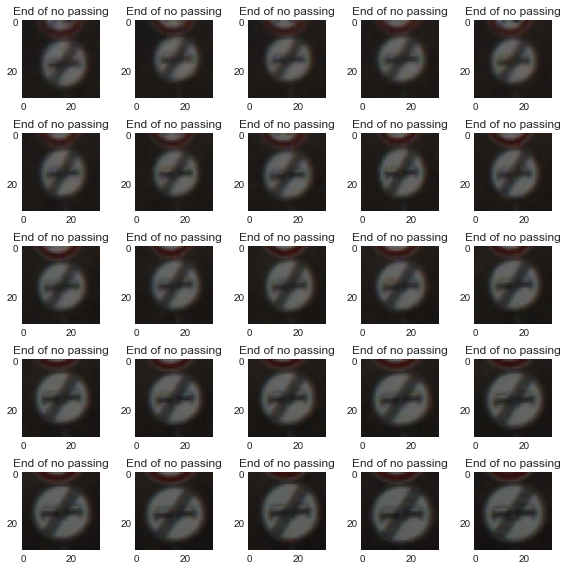

In [12]:
# Let's have a look at a few training images
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(8,8))
plt.tight_layout()
for i, ax in enumerate(axes.flatten()):
    ax.grid(False)
    ax.set_title(sign_names.loc[y_train[i], 'SignName'])
    ax.imshow(X_train[i])
plt.show()

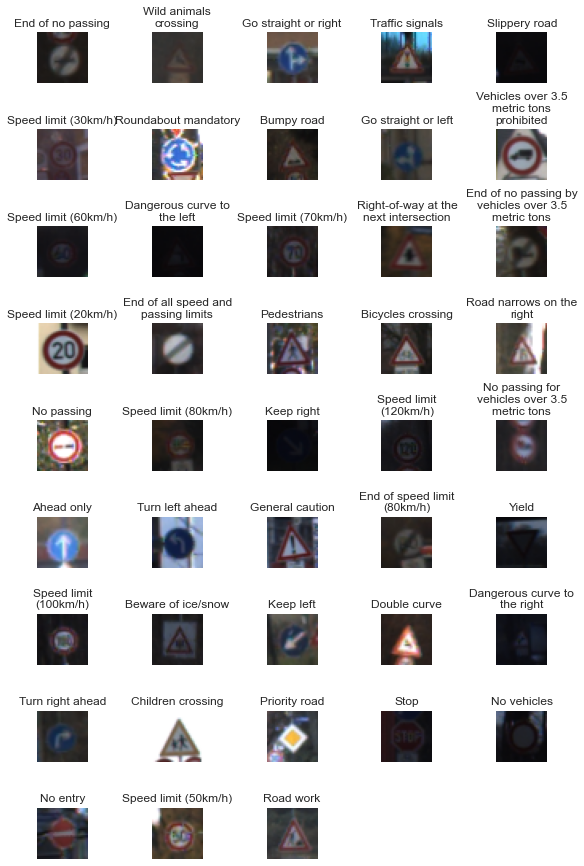

In [13]:
# We can see that there are a lot of duplicates of the same image here, with different
# levels of blur and translation.
# I'm going to do the same thing but only show signs from different classes
from textwrap import wrap
fig, axes = plt.subplots(nrows=9, ncols=5, figsize=(8,12))
for i in range(1,3):
    fig.delaxes(axes.flatten()[-i])
plt.tight_layout(h_pad=3, w_pad=2)
i = 0
current_class = y_train[0]
used_classes = []

for ax in axes.flatten():
    ax.grid(False)
    used_classes.append(current_class)
    #last_class = current_class
    if i >= len(y_train):
        break
    #current_class = y_train[i]
    title = sign_names.loc[y_train[i], 'SignName']
    ax.set_title('\n'.join(wrap(title,20)))
    ax.set_xticks(())
    ax.set_yticks(())
    ax.imshow(X_train[i])
    while current_class in used_classes:
        i += 1
        if i >= len(y_train):
            break
        current_class = y_train[i]
plt.show()

In [14]:
# Let's look at the comparative size of the sets:
total_count = X_train.shape[0] + X_valid.shape[0] + X_test.shape[0]
train_pct = X_train.shape[0] / total_count
valid_pct = X_valid.shape[0] / total_count
test_pct = X_test.shape[0] / total_count
print('Train set size:', train_pct)
print('Validation set size:', valid_pct)
print('Test set size:', test_pct)

Train set size: 0.6712899554389552
Validation set size: 0.08507108547618589
Test set size: 0.24363895908485889


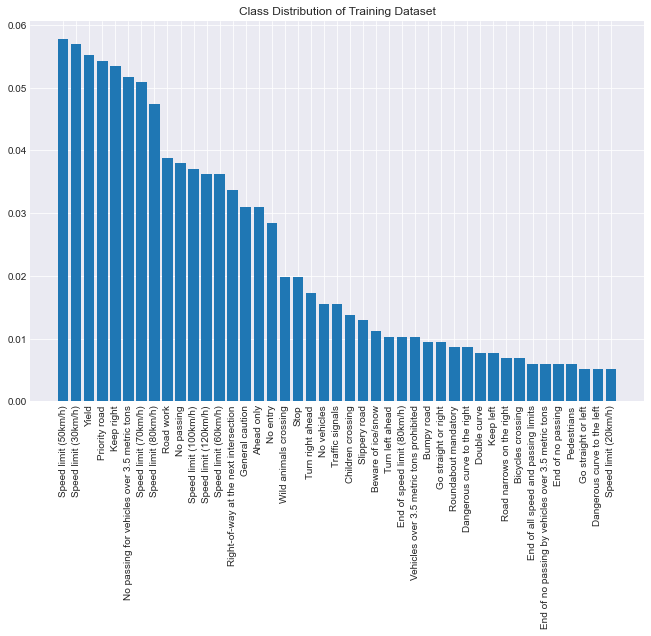

In [15]:
# Let's look at the distribution of classes in the training set
plt.figure(figsize=(11,7))
class_counts = pd.Series(y_train).value_counts(normalize=True)
class_labels = [sign_names.loc[label, 'SignName'] for label in class_counts.index]
plt.xticks(rotation=90)
plt.title('Class Distribution of Training Dataset')
plt.bar(x=class_labels, height=class_counts.values);

In [16]:
# We can see that there is an imbalance in the class representation in the training set
# Later I will use the proportions calculated above to weight the classes so that the
# under-represented classes in the training data weigh more heavily in the loss calculation

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [17]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps 
### could include converting to grayscale, etc.
### Feel free to use as many code cells as needed.

In [18]:
# Rather than normalize the data by hand, I will take advantage of the functionality of the
# ImageDataGenerator class offered in the Keras package. This class allows the images to be
# zero-centered and/or std normalized on a samplewise or training set-wide featurewise
# fashion. I will choose to do both zero-centering and std normalization on a featurewise basis

In [19]:
import tensorflow as tf

In [20]:
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras.layers import Dropout

In [21]:
# Instantiating the ImageDataGenerator class with the chosen preprocessing,
# and fitting it to the training set
datagen = ImageDataGenerator(featurewise_center=True, 
                             featurewise_std_normalization=True
                            )
datagen.fit(X_train)

In [22]:
# One-hot encoding the labels
y_train_cat = to_categorical(y_train)
y_valid_cat = to_categorical(y_valid)
y_test_cat = to_categorical(y_test)

In [23]:
# Creating iterators for training, validation, and testing
# A small batch size of 32 is generally good for generalization
# purposes and avoids overfitting to batches
train_iterator = datagen.flow(X_train, y_train_cat, batch_size=32)
valid_iterator = datagen.flow(X_valid, y_valid_cat, batch_size=32)
test_iterator = datagen.flow(X_test, y_test_cat, batch_size=32)

### Model Architecture

In [24]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [25]:
# I will try some different architectures, starting with LeNet

#### LeNet Architecture

In [26]:
width, height, channels = X_train.shape[1], X_train.shape[2], 3

In [27]:
def lenet_model_make():
    model = Sequential()
    model.add(Conv2D(6, (5, 5), activation='relu', 
                     input_shape=(width, height, channels),
                     padding='valid'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(16, (5, 5), activation='relu', padding='valid'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(120, activation='relu'))
    model.add(Dense(84, activation='relu'))
    model.add(Dense(43, activation='softmax'))
    
    return model

#### Custom Architecture

In [28]:
def custom_model_make():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', 
                     input_shape=(width, height, channels),
                     padding='valid'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='valid'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(120, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(84, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(43, activation='softmax'))
    
    return model

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [29]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [30]:
# I will be using the Adam optimizer for training my models
opt = tf.keras.optimizers.Adam()

#### LeNet (Plain)
In this section we will train a neural network with the exact architecture provided in the LeNet paper, and analyze the results.

In [39]:
# Create a LeNet network using the created function
lenet_model = lenet_model_make()

# compile model
lenet_model.compile(optimizer=opt, 
                    loss=tf.keras.losses.categorical_crossentropy, 
                    metrics=['accuracy'])
# fit model with generators. Note that classes are weighted according to the inverse of their
# representation within the training data
lenet_history = lenet_model.fit_generator(train_iterator, 
                                          validation_data=valid_iterator,
                                          steps_per_epoch=len(train_iterator), 
                                          class_weight=dict(1 / class_counts),
                                          epochs=20)

Epoch 1/20
1088/1088 [==============================] - 11s 9ms/step - loss: 73.1692 - accuracy: 0.5155 - val_loss: 0.5916 - val_accuracy: 0.8014
Epoch 2/20
1088/1088 [==============================] - 10s 9ms/step - loss: 9.4577 - accuracy: 0.9192 - val_loss: 0.3812 - val_accuracy: 0.8850
Epoch 3/20
1088/1088 [==============================] - 10s 9ms/step - loss: 4.4902 - accuracy: 0.9591 - val_loss: 0.4270 - val_accuracy: 0.8857
Epoch 4/20
1088/1088 [==============================] - 10s 9ms/step - loss: 3.9606 - accuracy: 0.9653 - val_loss: 0.3230 - val_accuracy: 0.9197
Epoch 5/20
1088/1088 [==============================] - 10s 9ms/step - loss: 2.2736 - accuracy: 0.9774 - val_loss: 0.3685 - val_accuracy: 0.9093
Epoch 6/20
1088/1088 [==============================] - 10s 9ms/step - loss: 2.6719 - accuracy: 0.9757 - val_loss: 0.3040 - val_accuracy: 0.9249
Epoch 7/20
1088/1088 [==============================] - 10s 9ms/step - loss: 2.4196 - accuracy: 0.9805 - val_loss: 0.3448 - val_a

In [40]:
# Creating a helper function to display the metrics from a training history
def plot_metrics(history, name='Model'):
    fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(11, 12))
    # summarize history for accuracy
    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_title('{} Accuracy'.format(name))
    ax1.set_ylabel('Accuracy')
    ax2.set_xlabel('Epoch')
    ax1.legend(['train', 'test'], loc='upper left')
    # summarize history for loss
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title('{} Loss'.format(name))
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend(['train', 'test'], loc='upper left')
    plt.show()

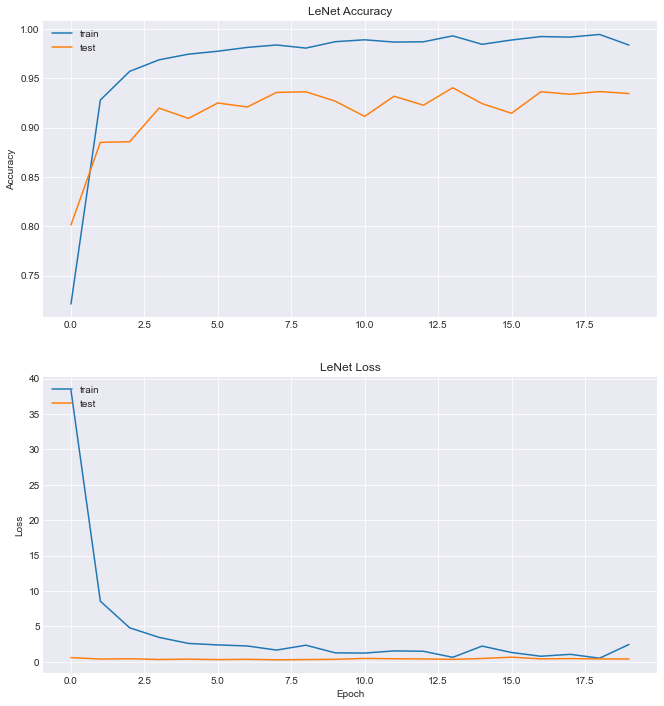

In [41]:
plot_metrics(lenet_history, name='LeNet')

##### Notes on plain LeNet:
We can see from the above experiment that the Validation Accuracy capped at just over 93%, while the training accuracy made its way to nearly 100%. This is an indication of overfitting, meaning that we have not regularized enough and the model will not generalize well. Adding some dropout layers between the fully connected layers should help with this. And if that is not enough, Batch Normalization can be applied.

In [44]:
# Let's make a new architecture that includes dropout in the fully connected layers of LeNet
def lenet_dropout_model_make(dropout_rate=0.3):
    model = Sequential()
    model.add(Conv2D(6, (5, 5), activation='relu', 
                     input_shape=(width, height, channels),
                     padding='valid'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(16, (5, 5), activation='relu', padding='valid'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(120, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(84, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(43, activation='softmax'))
    
    return model

In [45]:
# Create a LeNet network using the created function
lenet_dropout_model = lenet_dropout_model_make()

# compile model
lenet_dropout_model.compile(optimizer=opt, 
                            loss=tf.keras.losses.categorical_crossentropy, 
                            metrics=['accuracy'])
# fit model with generators. Note that classes are weighted according to the inverse of their
# representation within the training data
lenet_dropout_history = lenet_dropout_model.fit(train_iterator, 
                                                validation_data=valid_iterator,
                                                steps_per_epoch=len(train_iterator), 
                                                class_weight=dict(1 / class_counts),
                                                epochs=20)

Epoch 1/20
1088/1088 [==============================] - 11s 10ms/step - loss: 99.0078 - accuracy: 0.3307 - val_loss: 0.7860 - val_accuracy: 0.7771
Epoch 2/20
1088/1088 [==============================] - 11s 10ms/step - loss: 24.9544 - accuracy: 0.7683 - val_loss: 0.5351 - val_accuracy: 0.8637
Epoch 3/20
1088/1088 [==============================] - 10s 10ms/step - loss: 15.8024 - accuracy: 0.8543 - val_loss: 0.4458 - val_accuracy: 0.8984
Epoch 4/20
1088/1088 [==============================] - 10s 10ms/step - loss: 12.0102 - accuracy: 0.8870 - val_loss: 0.4832 - val_accuracy: 0.8712
Epoch 5/20
1088/1088 [==============================] - 10s 9ms/step - loss: 9.7267 - accuracy: 0.9070 - val_loss: 0.3770 - val_accuracy: 0.8968
Epoch 6/20
1088/1088 [==============================] - 10s 9ms/step - loss: 8.2919 - accuracy: 0.9214 - val_loss: 0.5262 - val_accuracy: 0.9236
Epoch 7/20
1088/1088 [==============================] - 10s 9ms/step - loss: 7.1115 - accuracy: 0.9296 - val_loss: 0.5509 

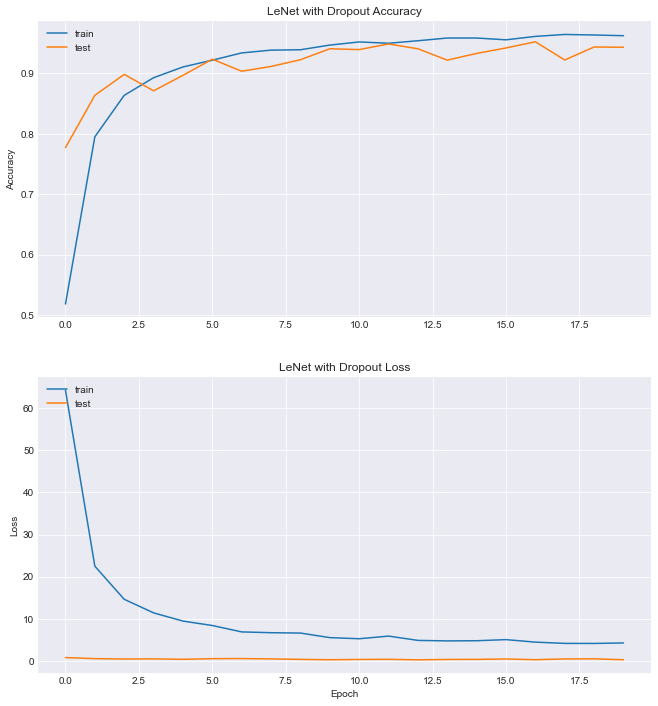

In [46]:
plot_metrics(lenet_dropout_history, name='LeNet with Dropout')

We can see that the LeNet architecture with dropout added has done less overfitting, and the validation and training accuracies are more similar, with the validation accuracy reaching slightly higher than it did before. There is a bit of excess variance in the validation accuracy over the epochs, and this could be the result of too large a learning rate, or too simple of a model architecture. Batch normalization may also help this issue, since without batch norm, model weights tend to chase a moving target. For the sake of comprehensiveness, let's try this same LeNet with dropout architecture with batch normalization added.

In [47]:
def lenet_custom_model_make():
    model = Sequential()
    model.add(Conv2D(6, (5, 5), activation='relu', 
                     input_shape=(width, height, channels),
                     padding='valid'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(16, (5, 5), activation='relu', padding='valid'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(120, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(84, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(43, activation='softmax'))
    
    return model

In [49]:
# Create a LeNet network using the created function
lenet_custom_model = lenet_dropout_model_make()

# compile model
lenet_custom_model.compile(optimizer=opt, 
                           loss=tf.keras.losses.categorical_crossentropy, 
                           metrics=['accuracy'])
# fit model with generators. Note that classes are weighted according to the inverse of their
# representation within the training data
lenet_custom_history = lenet_custom_model.fit(train_iterator, 
                                              validation_data=valid_iterator,
                                              steps_per_epoch=len(train_iterator), 
                                              class_weight=dict(1 / class_counts),
                                              epochs=20)

Epoch 1/20
1088/1088 [==============================] - 11s 10ms/step - loss: 112.7756 - accuracy: 0.2500 - val_loss: 0.8743 - val_accuracy: 0.7327
Epoch 2/20
1088/1088 [==============================] - 10s 10ms/step - loss: 29.5863 - accuracy: 0.7260 - val_loss: 0.5567 - val_accuracy: 0.8456
Epoch 3/20
1088/1088 [==============================] - 10s 10ms/step - loss: 17.3661 - accuracy: 0.8297 - val_loss: 0.4420 - val_accuracy: 0.8660
Epoch 4/20
1088/1088 [==============================] - 11s 10ms/step - loss: 12.8144 - accuracy: 0.8759 - val_loss: 0.4042 - val_accuracy: 0.9054
Epoch 5/20
1088/1088 [==============================] - 10s 9ms/step - loss: 11.1303 - accuracy: 0.8947 - val_loss: 0.3877 - val_accuracy: 0.9256
Epoch 6/20
1088/1088 [==============================] - 11s 10ms/step - loss: 9.2470 - accuracy: 0.9108 - val_loss: 0.2970 - val_accuracy: 0.9349
Epoch 7/20
1088/1088 [==============================] - 11s 10ms/step - loss: 7.6559 - accuracy: 0.9249 - val_loss: 0.2

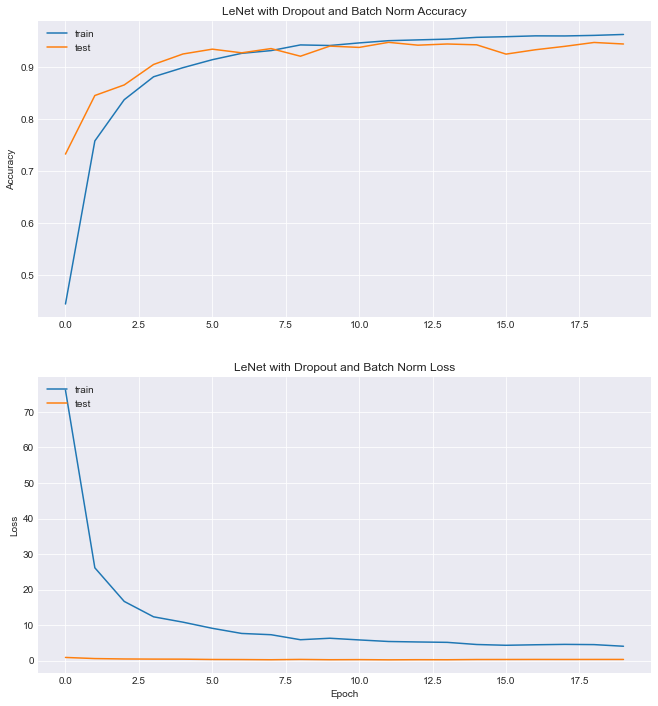

In [50]:
plot_metrics(lenet_custom_history, name='LeNet with Dropout and Batch Norm')

We can see that adding batch norm has stabilized the validation accuracy in the later epochs, but we are still capping out at just beneath 95% accuracy. Lowering the learning rate may help, but I think that it will be more fruitful to move on from LeNet at this point and try some more complex architectures. We will start with the custom model I made above.

#### Custom Model

In [51]:
# create custom model using function from above
custom_model = custom_model_make()

# compile model
custom_model.compile(optimizer=opt, 
                     loss=tf.keras.losses.categorical_crossentropy, 
                     metrics=['accuracy'])
# fit model with generator
custom_model_history = custom_model.fit(train_iterator, 
                                        validation_data=valid_iterator,
                                        steps_per_epoch=len(train_iterator), 
                                        class_weight=dict(1 / class_counts),
                                        epochs=20)

Epoch 1/20
1088/1088 [==============================] - 15s 13ms/step - loss: 166.1589 - accuracy: 0.0345 - val_loss: 2.7118 - val_accuracy: 0.1698
Epoch 2/20
1088/1088 [==============================] - 14s 13ms/step - loss: 99.2231 - accuracy: 0.2678 - val_loss: 1.1172 - val_accuracy: 0.6308
Epoch 3/20
1088/1088 [==============================] - 15s 14ms/step - loss: 48.8302 - accuracy: 0.6097 - val_loss: 0.4586 - val_accuracy: 0.8501
Epoch 4/20
1088/1088 [==============================] - 16s 15ms/step - loss: 23.4572 - accuracy: 0.8118 - val_loss: 0.3364 - val_accuracy: 0.9118
Epoch 5/20
1088/1088 [==============================] - 17s 16ms/step - loss: 13.5256 - accuracy: 0.8981 - val_loss: 0.2748 - val_accuracy: 0.9166
Epoch 6/20
1088/1088 [==============================] - 18s 16ms/step - loss: 9.1005 - accuracy: 0.9301 - val_loss: 0.1436 - val_accuracy: 0.9535
Epoch 7/20
1088/1088 [==============================] - 21s 19ms/step - loss: 7.2230 - accuracy: 0.9485 - val_loss: 0.

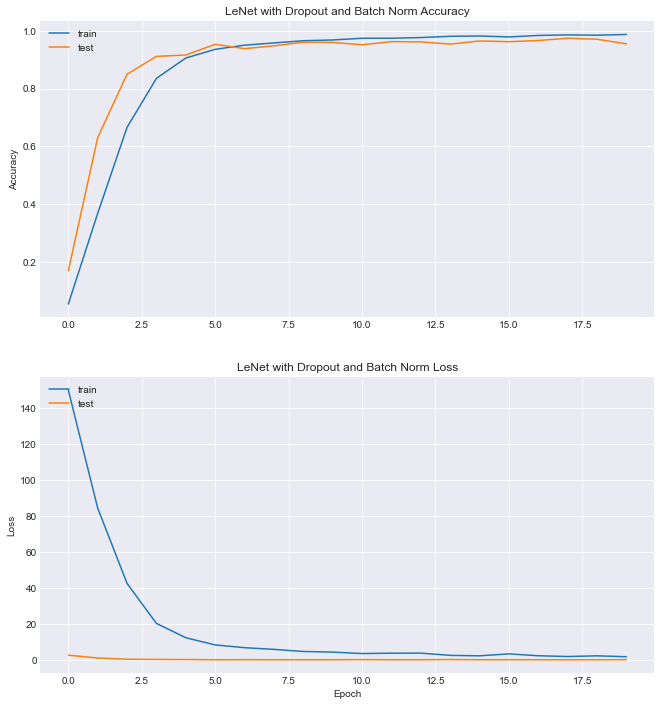

In [52]:
plot_metrics(custom_model_history, name='Custom Model')

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

In [54]:
# evaluate model
_, acc = custom_model.evaluate(test_iterator, steps=len(test_iterator), verbose=0)
print('Test Accuracy: %.3f' % (acc * 100))

Test Accuracy: 95.677


In [177]:
model.save('model_5_9_21')

INFO:tensorflow:Assets written to: model_5_9_21\assets


### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Predict the Sign Type for Each Image

In [3]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [4]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [3]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")